# K-Nearest Neighbours Decision Boundary

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
# https://anaconda.org/conda-forge/mlxtend
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from typing import List

In [7]:
def knn_comparision(data: pd.DataFrame, k: int) -> None:
    X = data[['x1','x2']].values
    y = data['y'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plotting decision regions
    plot_decision_regions(X, y, clf=clf, legend=2)

    # Adding axes annotations
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.show()
    
def plot_knn_subplots(data_func, k_values: List[int]) -> None:
    """
    Plots k-NN decision regions for different k values using subplots.

    Parameters
    ----------
    data_func : callable
        Function to generate the data.
    k_values : List[int]
        List of k values for k-NN.
    """
    data = data_func()
    rows = int(np.ceil(len(k_values) / 3))
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for idx, k in enumerate(k_values):
        X = data[["x1", "x2"]].values
        y = data["y"].astype(int).values
        clf = neighbors.KNeighborsClassifier(n_neighbors=k)
        clf.fit(X, y)

        # Plotting decision regions
        ax = axes[idx]
        plot_decision_regions(X, y, clf=clf, legend=2, ax=ax)

        # Adding axes annotations
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_title("Knn with K=" + str(k))

    plt.tight_layout()
    plt.show()

## Overlapping Data

The term "overlapping data" typically refers to a situation where the data
points belonging to different classes or categories are not well-separated and
instead intermingle or overlap in the feature space. In the context of
classification problems, overlapping data can make the task of learning a
decision boundary more challenging.

The function `overlapping_data()` you provided is using the
`make_classification` function from scikit-learn to generate a synthetic dataset
with two features and two classes. The parameters `n_features=2`,
`n_redundant=0`, and `n_clusters_per_class=1` are controlling the
characteristics of the generated data:

-   `n_features=2`: Specifies that there are two features, so the data is
    2-dimensional.
-   `n_redundant=0`: Ensures that there are no redundant features, meaning that
    both features contribute information to the classification task.
-   `n_clusters_per_class=1`: Specifies that there is only one cluster per
    class.

The combination of these parameters is likely to produce a dataset where the
classes are not perfectly separated and may overlap to some extent. This makes
the dataset useful for testing and visualizing classification algorithms,
especially those that can handle non-linear decision boundaries, such as K-NN.

In summary, "overlapping data" in this context means that the data points from
different classes are not clearly separated from each other, and there may be
regions in the feature space where points from different classes are mixed
together.

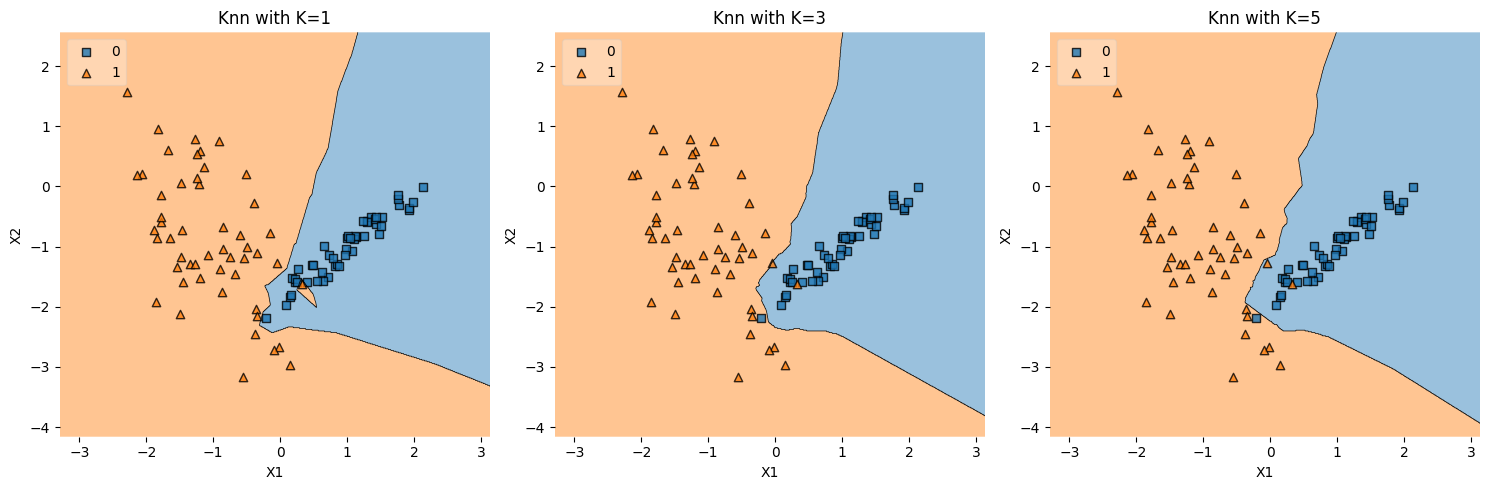

In [11]:
def overlapping_data() -> pd.DataFrame:
    X, y = datasets.make_classification(
        n_features=2, n_redundant=0, n_clusters_per_class=1
    )
    df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))
    return df

k_values = [1, 3, 5, 9, 15, 30]
plot_knn_subplots(overlapping_data, k_values)

## Ushape Data

The function `ushape_data()` generates a dataset that consists of two "U"-shaped
or crescent-shaped clusters. This is achieved using the `datasets.make_moons`
function from scikit-learn, which is designed to create a binary classification
dataset with two interleaving half-circles or "moons." The parameter `noise=0.1`
adds some random noise to the data, making the separation between the classes
less perfect.

Here's why U-shaped data (or moon-shaped data) is interesting and often used:

### 1. Non-Linear Separation

The two classes in U-shaped data cannot be perfectly separated by a linear
decision boundary. This makes the dataset a useful test case for evaluating
classifiers that can handle non-linear decision boundaries, such as k-NN,
decision trees, and kernel SVM.

### 2. Visualization

The U-shaped pattern is visually distinct and easy to recognize. When
visualizing the decision boundaries of different classifiers, the U-shaped data
helps in illustrating how various algorithms capture or fail to capture the
non-linear patterns in the data.

### 3. Benchmarking

Because the underlying pattern of U-shaped data is well-understood, it can be
used as a benchmark to compare the performance of different algorithms on a
non-trivial, non-linear classification task.

### 4. Overfitting Demonstration

The U-shaped pattern can be sensitive to noise and the choice of
hyperparameters. This sensitivity makes it a good dataset for demonstrating
concepts like overfitting and the importance of hyperparameter tuning.

### 5. Clustering Analysis

Beyond classification, the U-shaped data can also be used to evaluate clustering
algorithms, particularly those designed to detect non-convex clusters.

### Conclusion

U-shaped data is a standard synthetic dataset used in machine learning to
demonstrate, test, and compare algorithms capable of non-linear classification
or clustering. It provides a clear and intuitive example of a situation where
linear models are insufficient, thus showcasing the strengths and weaknesses of
various algorithms in handling complex patterns.

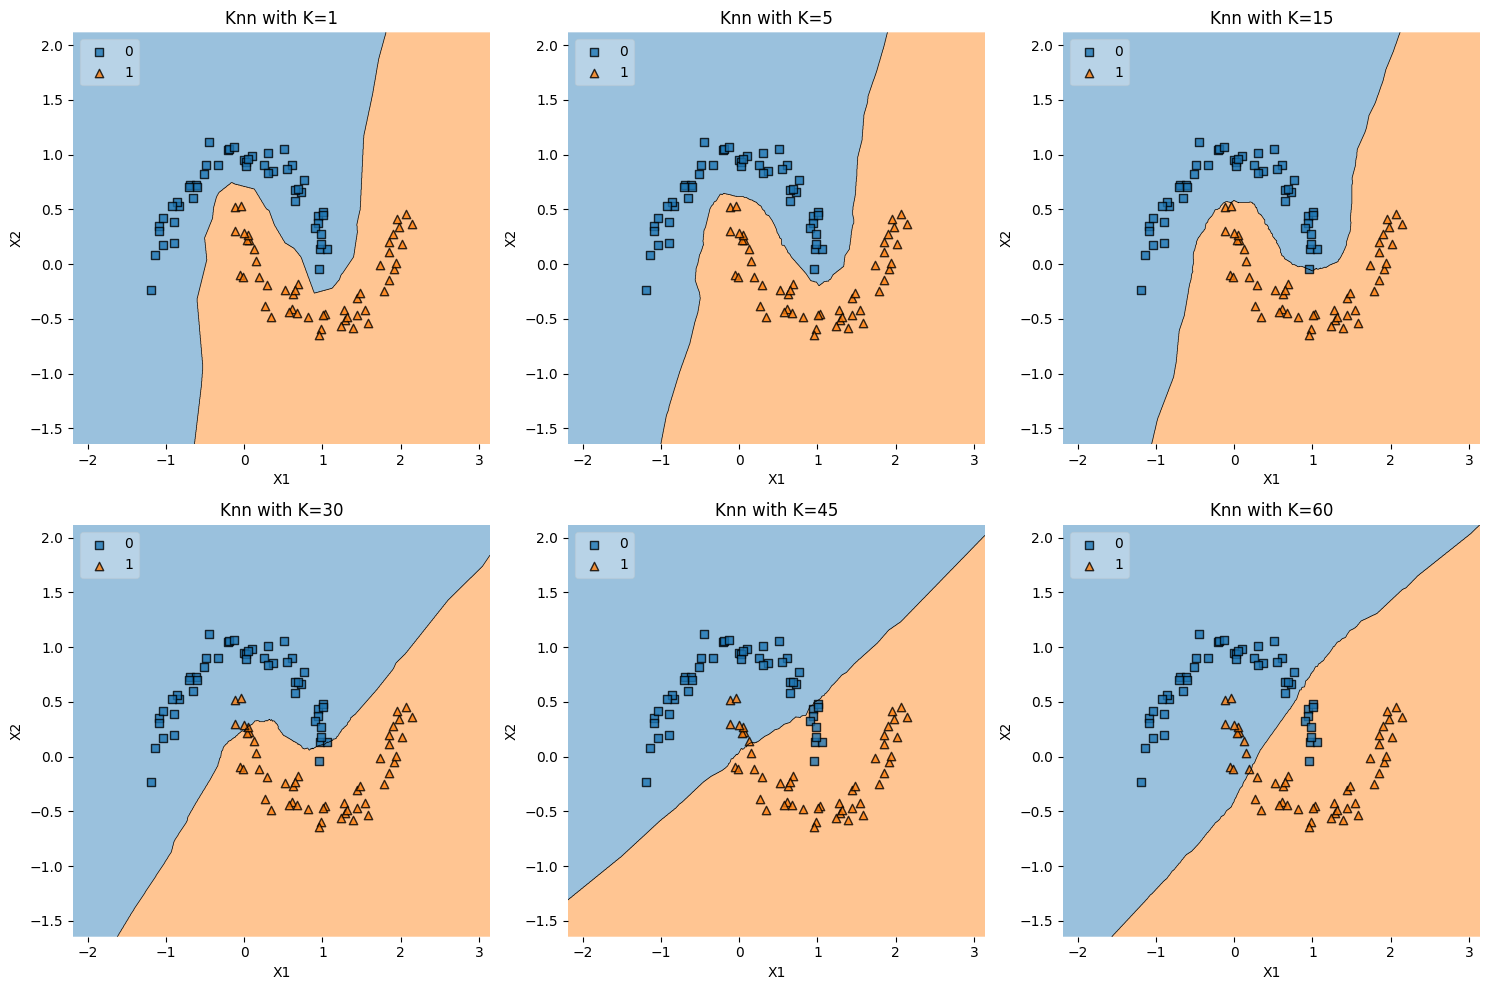

In [9]:
def ushape_data() -> pd.DataFrame:
    X, y = datasets.make_moons(noise=0.1)
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
    return df

k_values = [1, 5, 15, 30, 45, 60]
plot_knn_subplots(ushape_data, k_values)

## Linear Separability

The function `linear_sep_data()` generates a dataset that consists of
two linearly separable clusters or "blobs." This is achieved using the
`datasets.make_blobs` function from scikit-learn with parameters `n_features=2`
and `centers=2`, which creates two clusters in a two-dimensional feature space.

Here's an explanation of what's happening in the code and why this type of data
is useful:

### 1. **Creating Linearly Separable Data**

-   `datasets.make_blobs` is used to generate isotropic Gaussian blobs for
    clustering or classification tasks.
-   `n_features=2` specifies that there are two features, making the data
    2-dimensional.
-   `centers=2` specifies that there are two distinct centers, leading to two
    well-separated clusters.

### 2. **K-NN Classification**

-   The `plot_knn_subplots` function (defined earlier) is called with the
    `linear_sep_data` function and a list of $K$ values.
-   For each value of $K$, a K-NN classifier is trained on the data, and the
    decision regions are plotted. Since the data is linearly separable, even a
    small value of $K$ should be able to classify the data perfectly or
    near-perfectly.

### 3. **Visualizing Decision Boundaries**

-   The subplots show how the decision boundary of the K-NN algorithm changes
    with different values of $K$.
-   You might observe that the decision boundary becomes smoother as $K$
    increases, reflecting the increased regularization effect of considering
    more neighbors.

### 4. **Interest in Linearly Separable Data**

-   Linearly separable data is useful for demonstrating algorithms that can find
    a linear decision boundary, such as linear SVM or logistic regression.
-   It can also be used to show how more complex models like K-NN or non-linear
    SVM can adapt to linear as well as non-linear patterns.
-   It serves as a simple baseline case to understand the behavior of different
    algorithms.

### Conclusion

The code snippet generates a dataset with two linearly separable clusters and
then applies K-NN classification for different values of $K$, visualizing the
decision regions in subplots. This helps in understanding how the K-NN algorithm
behaves on a simple dataset where the classes can be perfectly separated by a
straight line, and how the choice of $K$ affects the decision boundary. It's a
valuable tool for illustrating fundamental concepts in classification and model
complexity.

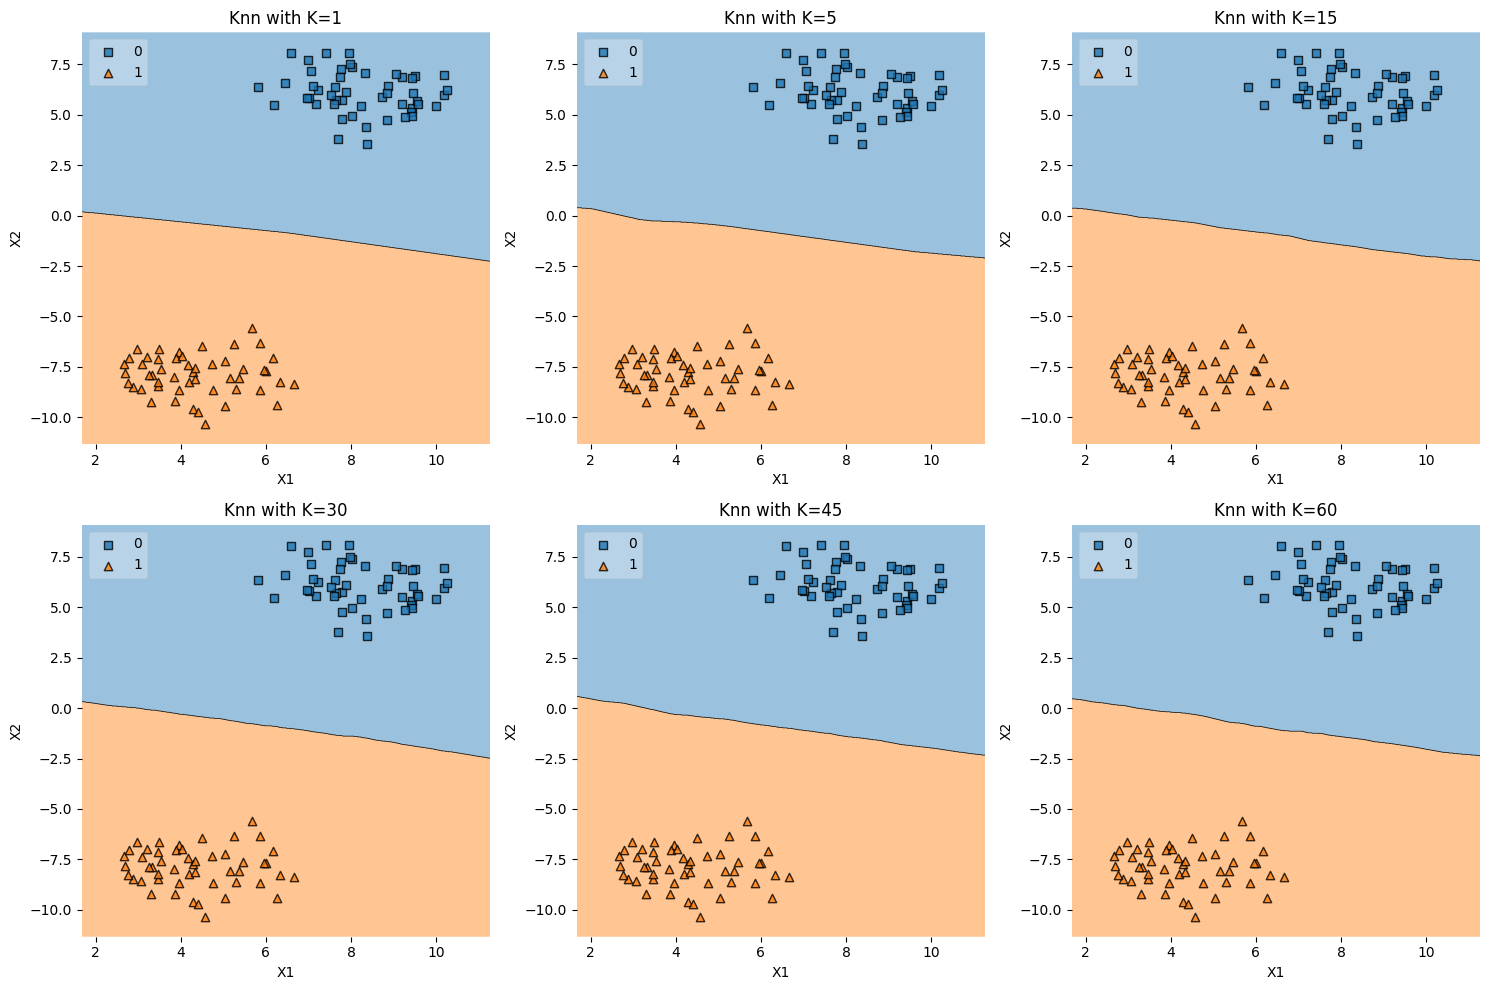

In [12]:
def linear_sep_data() -> pd.DataFrame:
    X, y = datasets.make_blobs(n_features=2, centers=2)
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
    return df

k_values = [1, 5, 15, 30, 45, 60]
plot_knn_subplots(linear_sep_data, k_values)

## XOR Data

The `xor_data()` function generates a synthetic dataset that
represents the XOR (exclusive or) problem, and then you're using k-NN to
classify this data for various values of $K$.

### XOR Data

The XOR function returns true if exactly one of its inputs is true, and false
otherwise. In the context of a 2-dimensional feature space, the XOR problem can
be visualized as having two classes where:

-   Class 1: Points in the first and third quadrants.
-   Class 2: Points in the second and fourth quadrants.

Here's an explanation of the code:

1. **Generating Data**:

    - `X = np.random.randn(200, 2)`: Creates 200 random data points in a
      2-dimensional space, drawn from a standard normal distribution.
    - `y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)`: Computes the XOR operation
      on the signs of the two features for each data point, effectively dividing
      the space into the XOR pattern.

2. **K-NN Classification**:

    - The `plot_knn_subplots` function is called with the `xor_data` function
      and a list of $K$ values.
    - For each value of $K$, a k-NN classifier is trained on the XOR data, and
      the decision regions are plotted.

3. **Visualizing Decision Boundaries**:
    - The subplots show how the decision boundary of the k-NN algorithm changes
      with different values of $K$.
    - The XOR problem is inherently non-linear, and the decision boundary will
      reflect the complex shape of the XOR pattern.

### Interest in XOR Data

-   **Non-Linearity**: The XOR problem is a classic example of a problem that is
    not linearly separable. No straight line can perfectly separate the classes.
-   **Benchmarking**: XOR is often used to test the ability of algorithms to
    capture non-linear patterns.
-   **Understanding Model Complexity**: Different values of $K$ will show how
    the complexity of the model affects the ability to capture the XOR pattern.
    Smaller values of $K$ may capture the pattern more closely but may also
    overfit to noise, while larger values of $K$ may generalize better but fail
    to capture the pattern precisely.

### Conclusion

The code snippet generates a dataset representing the XOR problem and applies
k-NN classification for different values of $K$, visualizing the decision
regions in subplots. It serves as an illustrative example of a non-linear
classification problem and demonstrates how k-NN can adapt to complex decision
boundaries, depending on the choice of $K$. It's a valuable example for studying
the behavior of non-linear classifiers and understanding the trade-offs between
fitting complexity and generalization.

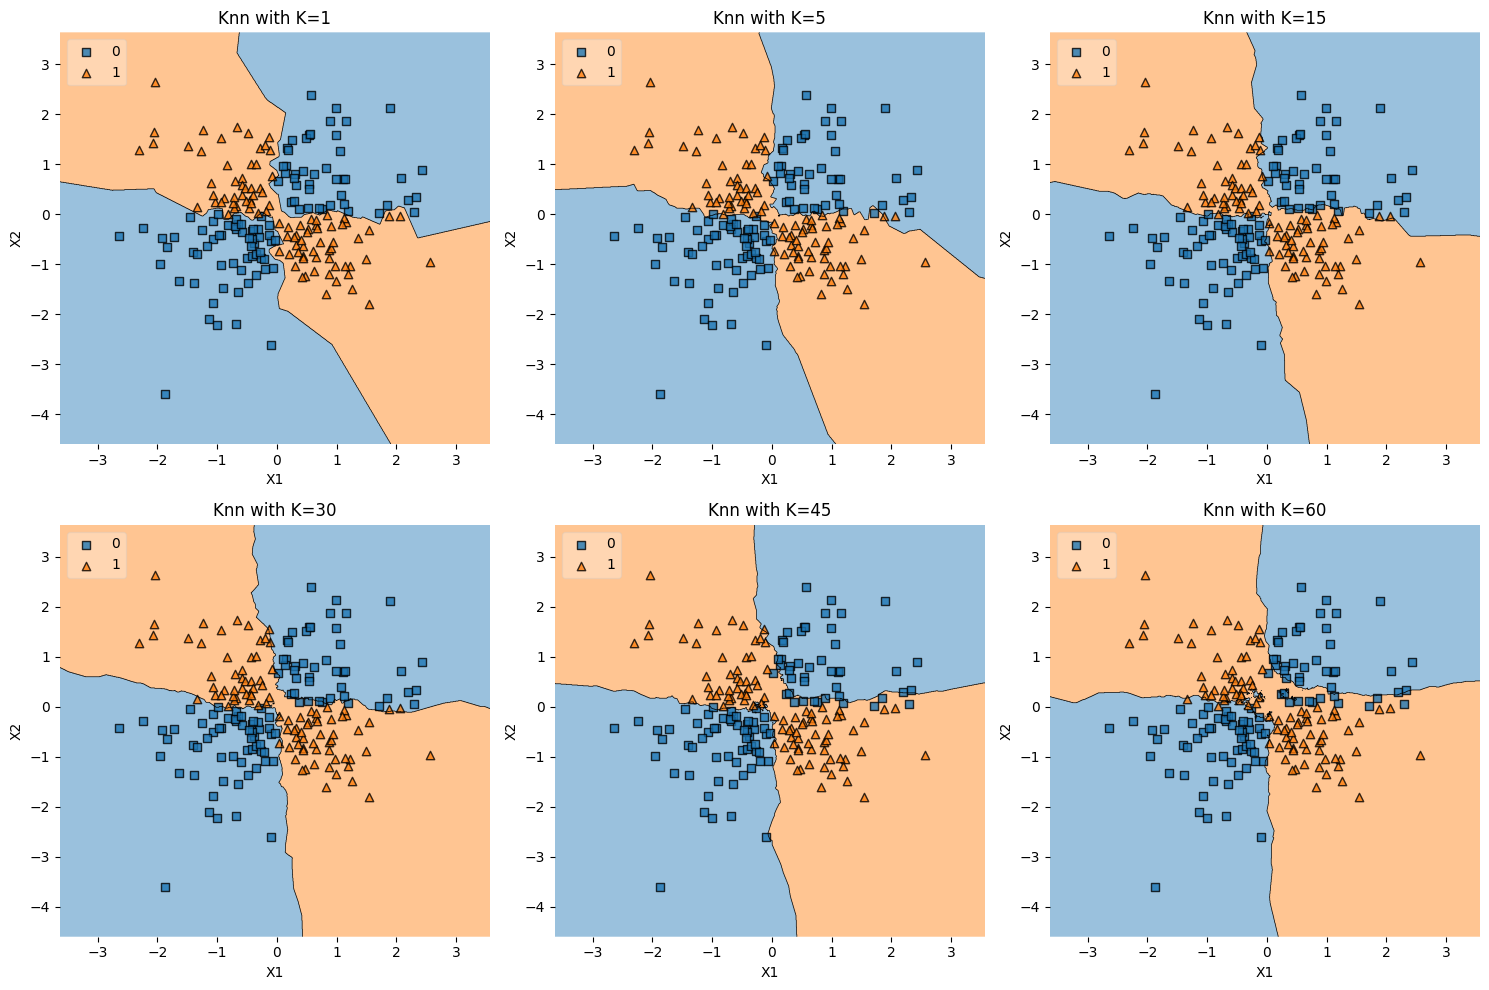

In [13]:
def xor_data() -> pd.DataFrame:
    X = np.random.randn(200, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y.astype(int)))
    return df

k_values = [1, 5, 15, 30, 45, 60]
plot_knn_subplots(xor_data, k_values)

## Two Spirals Data

The two-spirals dataset is a visually compelling and mathematically complex
pattern that has been a significant benchmark problem in machine learning.
Here's why it's interesting and the rationale behind its use:

### 1. **Complexity and Non-Linearity**

-   **Pattern**: The two-spirals dataset consists of points arranged in two
    intertwined spirals. This creates a non-linear and intricate boundary
    between the two classes.
-   **Challenge**: There is no straight line that can separate the two classes,
    making it a non-trivial problem for machine learning algorithms.

### 2. **Historical Significance in Neural Networks**

-   **Early Benchmark**: The two-spirals problem was used as a benchmark problem
    to test early neural networks.
-   **Understanding Hidden Layers**: It helped researchers understand the
    importance of hidden layers and non-linear activation functions in capturing
    complex patterns.

### 3. **Testing Non-Linear Algorithms**

-   **Robust Test**: The problem serves as a robust test for algorithms capable
    of handling non-linear decision boundaries, such as k-NN, SVM with
    non-linear kernels, and deep learning models.
-   **Hyperparameter Tuning**: It's valuable for tuning hyperparameters, such as
    the number of neighbors in k-NN.

### 4. **Visualization and Interpretation**

-   **Visual Appeal**: The two-spirals problem provides a visually appealing way
    to illustrate the behavior of different algorithms.
-   **Understanding Overfitting**: The complex pattern can lead to overfitting
    if the model is too flexible. It's an excellent case to study the trade-offs
    between model complexity and generalization.

### 5. **Rationale Behind Two Spirals Code**

-   **Generation**: The code generates two spirals by taking the square root of
    random numbers, scaling them, and applying sine and cosine functions. Noise
    can be added to make the pattern less perfect.
-   **Negative Mirror**: One spiral is generated, and its negative mirror image
    forms the second spiral (`X1` and `X2` in the code).
-   **Binary Classification**: The dataset is constructed for a binary
    classification task, where each spiral represents one class.

### Conclusion

The two-spirals problem is not just visually intriguing but also carries rich
historical and practical significance in the field of machine learning. It's a
benchmark for understanding non-linear decision boundaries, the capabilities of
different algorithms, overfitting, and the role of hyperparameters. The
generated dataset offers a tangible way to explore and visualize these critical
concepts. By using the k-NN algorithm with $K = 5$, as in your example, you
can see how this specific model captures the complex boundary between the
spirals, shedding light on its ability to handle non-linear patterns.


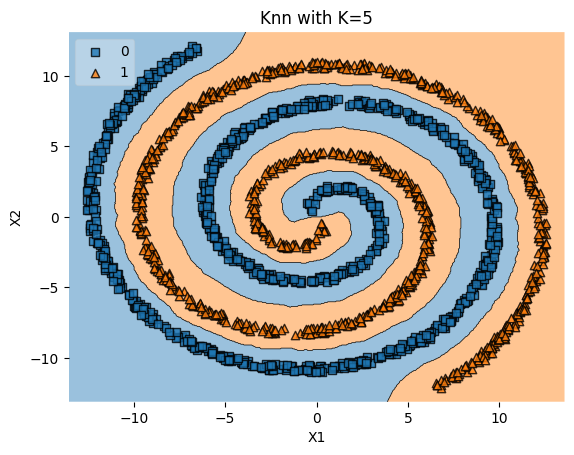

In [16]:
def two_spirals_data(n_points: int, noise: float = 0.5) -> pd.DataFrame:
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    X1 = np.hstack((d1x, d1y))
    X2 = np.hstack((-d1x, -d1y))
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y.astype(int)))
    return df

knn_comparision(two_spirals_data(1000), 5)

## S-Curve Data

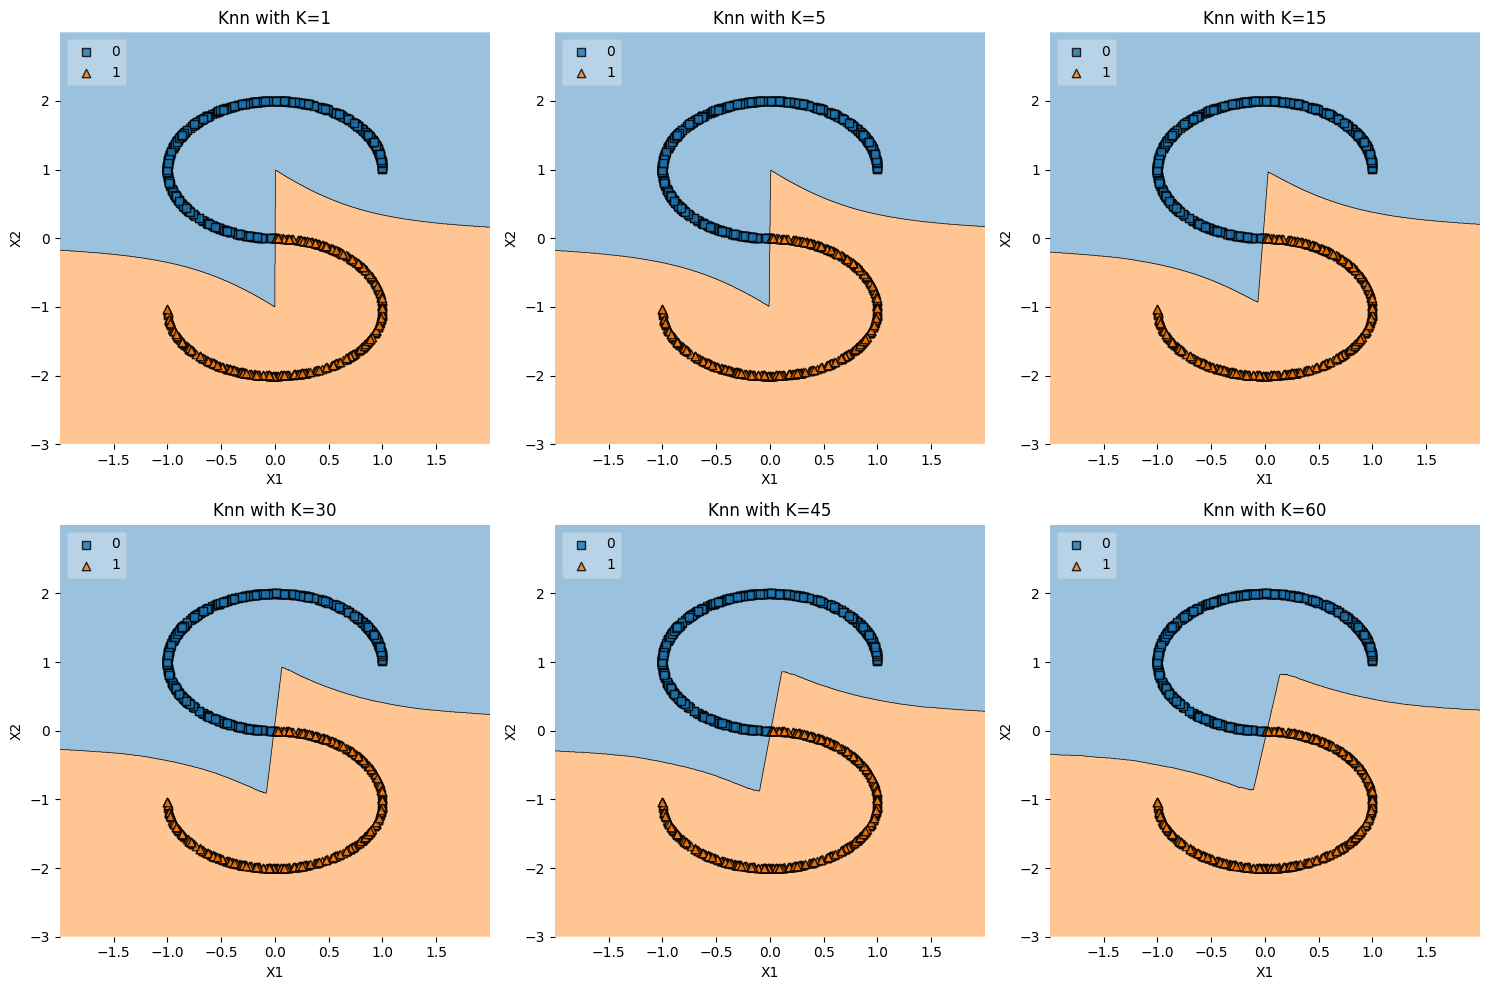

In [14]:
def s_curve_data() -> pd.DataFrame:
    X, y = datasets.make_s_curve(n_samples=1000)
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,2], y=y > 0))
    return df

k_values = [1, 5, 15, 30, 45, 60]
plot_knn_subplots(s_curve_data, k_values)

## Outlier Data

### Explanation

-   **Generation**: The `outlier_data()` function creates a two-class,
    two-feature dataset using `make_classification`. Then, an outlier is
    manually introduced by shifting one data point far from the others
    (`X[0][0] += 10`).
-   **Effect of Outlier**: By adding an outlier, the distribution of the data is
    skewed, potentially affecting the decision boundary.
-   **k-NN Classification**: Different values of $K$ are used to show how the
    decision boundary changes in the presence of an outlier.

### Why is Outlier Data Interesting?

-   **Sensitivity to Outliers**: Some models, especially when using small values
    of $K$ in k-NN, are highly sensitive to outliers. This dataset helps in
    understanding and visualizing that sensitivity.
-   **Robustness Testing**: By observing how different values of $K$ handle the
    outlier, we can gain insights into the robustness of the model.
-   **Real-World Scenarios**: Outliers are common in real-world data, so
    understanding their effect on different algorithms is essential.

### Conclusion

**Outlier Data** helps in understanding the sensitivity and robustness of
models to outliers, reflecting real-world data challenges.

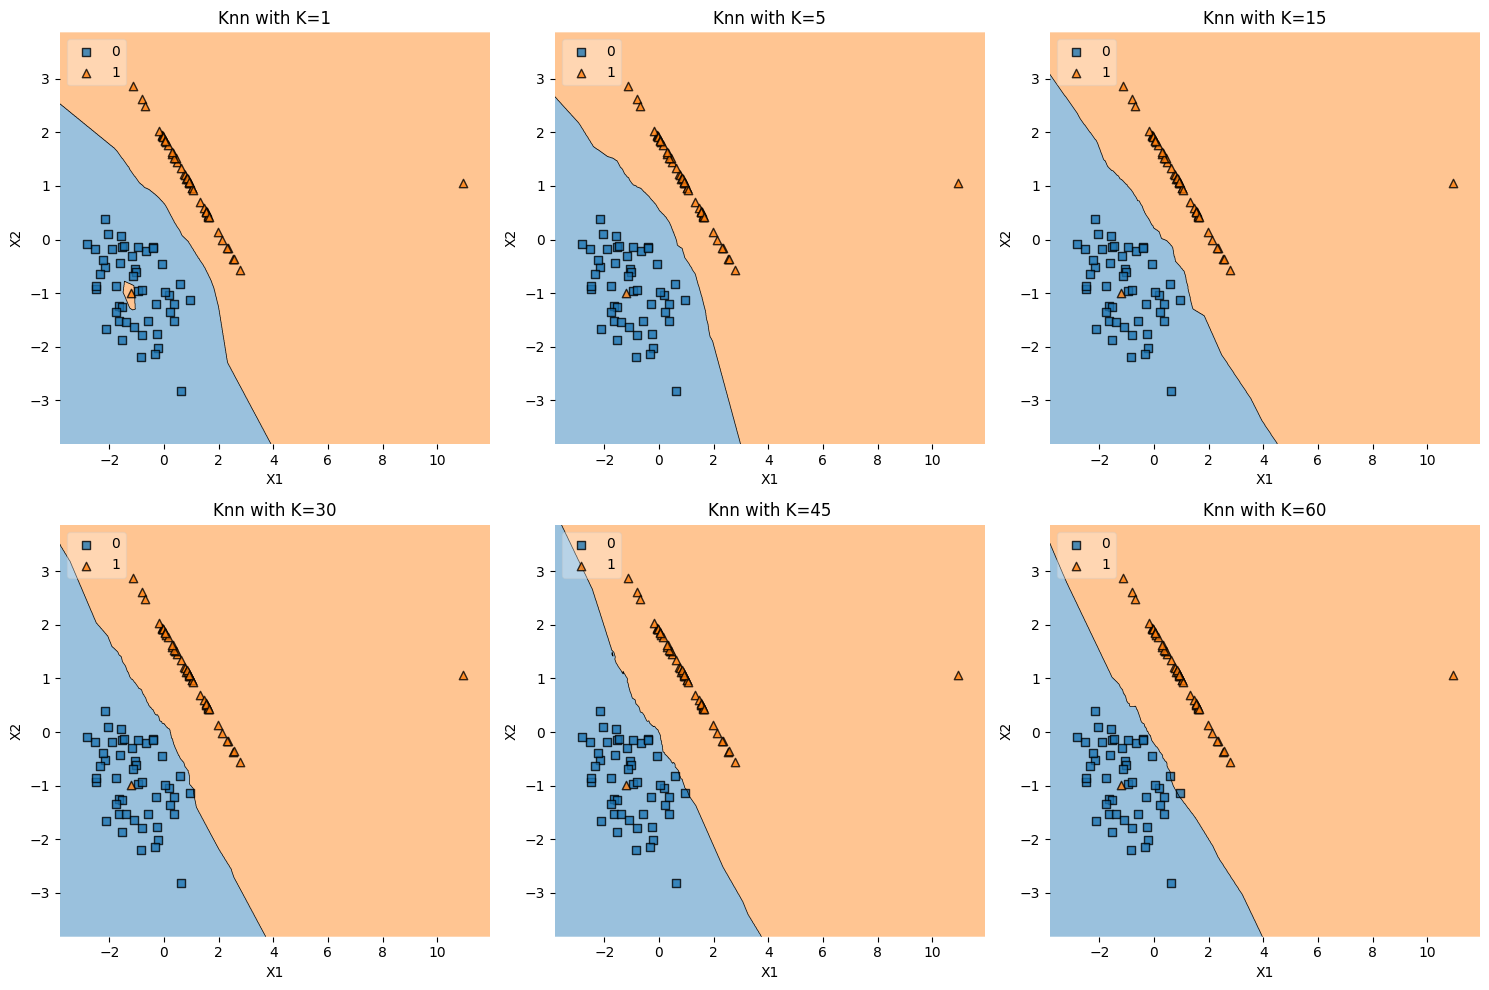

In [17]:
def outlier_data() -> pd.DataFrame:
    X, y = datasets.make_classification(
        n_features=2, n_redundant=0, n_clusters_per_class=1
    )
    X[0][0] += 10  # Adding an outlier
    df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))
    return df

k_values = [1, 5, 15, 30, 45, 60]
plot_knn_subplots(outlier_data, k_values)

## Concetric Circles Data

### Explanation

-   **Generation**: The `concentric_circles_data()` function creates two classes
    arranged in concentric circles using `datasets.make_circles`. The `factor`
    parameter controls the distance between the circles.
-   **Non-Linearity**: This dataset is not linearly separable, as the classes
    form concentric patterns.
-   **k-NN Classification**: The k-NN algorithm is applied to classify the data
    with $k=3$, using two different values of the `factor` to show how changing
    the distance between the circles affects classification.

### Why is Concentric Circles Data Interesting?

-   **Complex Decision Boundaries**: The concentric pattern requires a complex
    decision boundary, providing a robust test for algorithms capable of
    non-linear classification.
-   **Understanding Model Flexibility**: By changing the `factor`, you can
    observe how the model adapts to different levels of complexity in the
    pattern.
-   **Benchmarking Non-Linear Models**: Like the XOR and two-spirals problems,
    the concentric circles dataset is another classic benchmark for testing
    non-linear classifiers.

### Conclusion

**Concentric Circles Data** serves as a test for non-linear classifiers and
provides insights into model flexibility and complexity.

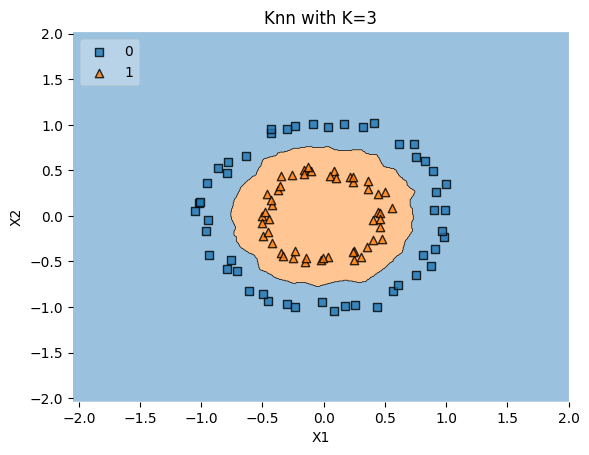

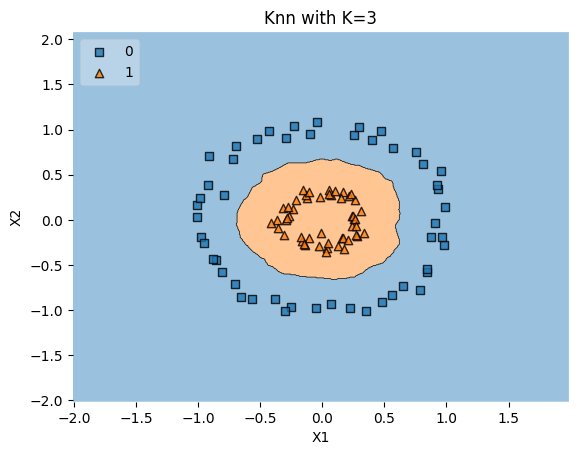

In [18]:
def concentric_circles_data(factor=0.5) -> pd.DataFrame:
    X, y = datasets.make_circles(noise=0.05, factor=factor)
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
    return df

knn_comparision(concentric_circles_data(factor=0.5), k=3)
knn_comparision(concentric_circles_data(factor=0.3), k=3)
